## Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0,'..')
import Imputation_Module as imp
import FeatureEngineering_Module as fe
import OneHotEncoding_Module as ohe
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings(action="ignore")

## Data

In [2]:
train = pd.read_csv("../train.csv", index_col = "Id")
test = pd.read_csv("../test.csv", index_col = "Id")

## Missingness

In [3]:
train, test = imp.impute_data()

## Feature Engineering

In [4]:
# apply feature enginerring modules
pipe = Pipeline([
    ('selector', fe.FeatureEngineering())
])

train = pipe.transform(train)
test = pipe.transform(test)

In [5]:
# dummify
train_dummies, test_dummies = ohe.Dummify.transform(train, test)

In [6]:
train.shape, test.shape

((1456, 50), (1459, 49))

In [7]:
train_dummies.shape, test_dummies.shape

((1456, 175), (1459, 174))

### removing outliers

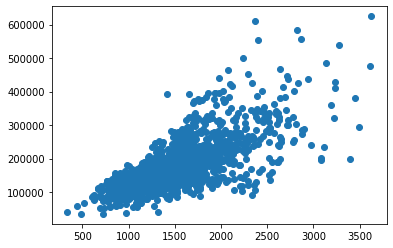

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.show()

In [9]:
#train.drop(train[train["GrLivArea"] > 4000].index, inplace=True)

In [10]:
train

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,SaleType,SaleCondition,SalePrice,SecondFlr,PorchSF,ExtraRoom,SinceRemod,FullBaths,HalfBaths
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450.0,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,GO,Avg,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Ex,Y,SBrkr,1710.0,3.0,1.0,Gd,Typ,0.0,Attchd,RFn,2.0,TA,TA,Y,0.0,2,WD,Normal,208500.0,1,61.0,5.0,5,3.0,1.0
2,RL,80.0,9600.0,Reg,Lvl,FR,Veenker,Abnorm,1Fam,1Story,AA,GO,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Ex,Y,SBrkr,1262.0,3.0,1.0,TA,Typ,1.0,Attchd,RFn,2.0,TA,TA,Y,298.0,5,WD,Normal,181500.0,0,0.0,3.0,31,2.0,1.0
3,RL,68.0,11250.0,IR,Lvl,Inside,CollgCr,Norm,1Fam,2Story,GO,Avg,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Ex,Y,SBrkr,1786.0,3.0,1.0,Gd,Typ,1.0,Attchd,RFn,2.0,TA,TA,Y,0.0,9,WD,Normal,223500.0,1,42.0,3.0,6,3.0,1.0
4,RL,60.0,9550.0,IR,Lvl,Corner,Crawfor,Norm,1Fam,2Story,GO,Avg,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Gd,Y,SBrkr,1717.0,3.0,1.0,Gd,Typ,1.0,Detchd,Unf,3.0,TA,TA,Y,0.0,2,WD,Unconv,140000.0,1,307.0,4.0,36,2.0,0.0
5,RL,84.0,14260.0,IR,Lvl,FR,NoRidge,Norm,1Fam,2Story,GO,Avg,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Ex,Y,SBrkr,2198.0,4.0,1.0,Gd,Typ,1.0,Attchd,RFn,3.0,TA,TA,Y,192.0,12,WD,Normal,250000.0,1,84.0,5.0,8,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,62.0,7917.0,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,AA,Avg,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Ex,Y,SBrkr,1647.0,3.0,1.0,TA,Typ,1.0,Attchd,RFn,2.0,TA,TA,Y,0.0,8,WD,Normal,175000.0,1,40.0,4.0,7,2.0,1.0
1457,RL,85.0,13175.0,Reg,Lvl,Inside,NWAmes,Norm,1Fam,1Story,AA,AA,Gable,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,TA,Y,SBrkr,2073.0,3.0,1.0,TA,Nottyp,2.0,Attchd,Unf,2.0,TA,TA,Y,349.0,2,WD,Normal,210000.0,0,0.0,4.0,22,3.0,0.0
1458,RL,66.0,9042.0,Reg,Lvl,Inside,Crawfor,Norm,1Fam,2Story,GO,EX,Gable,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,Ex,Y,SBrkr,2340.0,4.0,1.0,Gd,Typ,2.0,Attchd,RFn,1.0,TA,TA,Y,0.0,5,WD,Normal,266500.0,1,60.0,5.0,4,2.0,0.0


In [11]:
test

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,SaleType,SaleCondition,SecondFlr,PorchSF,ExtraRoom,SinceRemod,FullBaths,HalfBaths
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,RH,80.0,11622.0,Reg,Lvl,Inside,NAmes,Abnorm,1Fam,1Story,Avg,AA,Gable,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,TA,Y,SBrkr,896.0,2.0,1.0,TA,Typ,0.0,Attchd,Unf,1.0,TA,TA,Y,140.0,6,WD,Normal,0,120.0,3.0,49,1.0,0.0
1462,RL,81.0,14267.0,IR,Lvl,Corner,NAmes,Norm,1Fam,1Story,AA,AA,Hip,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,TA,Y,SBrkr,1329.0,3.0,1.0,Gd,Typ,0.0,Attchd,Unf,1.0,TA,TA,Y,393.0,6,WD,Normal,0,36.0,3.0,52,1.0,1.0
1463,RL,74.0,13830.0,IR,Lvl,Inside,Gilbert,Norm,1Fam,2Story,Avg,Avg,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,Gd,Y,SBrkr,1629.0,3.0,1.0,TA,Typ,1.0,Attchd,Fin,2.0,TA,TA,Y,212.0,3,WD,Normal,1,34.0,3.0,12,2.0,1.0
1464,RL,78.0,9978.0,IR,Lvl,Inside,Gilbert,Norm,1Fam,2Story,AA,AA,Gable,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,Ex,Y,SBrkr,1604.0,3.0,1.0,Gd,Typ,1.0,Attchd,Fin,2.0,TA,TA,Y,360.0,6,WD,Normal,1,36.0,4.0,12,2.0,1.0
1465,RL,43.0,5005.0,IR,NotLvl,Inside,StoneBr,Norm,TwnhsE,1Story,GO,Avg,Gable,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,Ex,Y,SBrkr,1280.0,2.0,1.0,Gd,Typ,0.0,Attchd,RFn,2.0,TA,TA,Y,0.0,1,WD,Normal,0,226.0,3.0,18,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,21.0,1936.0,Reg,Lvl,Inside,MeadowV,Norm,Twnhs,2Story,BA,GO,Gable,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,Gd,Y,SBrkr,1092.0,3.0,1.0,TA,Typ,0.0,N/A,N/A,0.0,N/A,N/A,Y,0.0,6,WD,Normal,1,0.0,2.0,36,1.0,1.0
2916,RM,21.0,1894.0,Reg,Lvl,Inside,MeadowV,Norm,TwnhsE,2Story,BA,Avg,Gable,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,TA,Y,SBrkr,1092.0,3.0,1.0,TA,Typ,0.0,Detchd,Unf,1.0,TA,TA,Y,0.0,4,WD,Unconv,1,24.0,3.0,36,1.0,1.0
2917,RL,160.0,20000.0,Reg,Lvl,Inside,Mitchel,Norm,1Fam,1Story,Avg,GO,Gable,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,Ex,Y,SBrkr,1224.0,4.0,1.0,TA,Typ,1.0,Detchd,Unf,2.0,TA,TA,Y,474.0,9,WD,Unconv,0,0.0,3.0,10,2.0,0.0


In [12]:
train.to_csv(r'./train_final.csv', index = False)
test.to_csv(r'./test_final.csv', index = False)
train_dummies.to_csv(r'./train_dummies_final.csv', index = False)
test_dummies.to_csv(r'./test_dummies_final.csv', index = False)